In [4]:
from scanimagetiffio.scanimagetiffio import SITiffIO
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")
from utils_image import UnrotateFrame_SITiffIO

In [2]:

dataFolder = '/home/zilong/Desktop/2D2P/Data/162_10072023/'
tifffilename = dataFolder+ '162_block2__00001.tif'
relogfilename = dataFolder + 'REdata_20230706_171218.txt'

#load data
S = SITiffIO()
S.open_tiff_file(tifffilename, "r")
S.open_rotary_file(relogfilename)
S.interp_times()  # might take a while...

Loading rotary encoder file: /home/zilong/Desktop/2D2P/Data/162_10072023/REdata_20230706_171218.txt
Calculating rotations and times from rotary encoder data...
Finished calculating rotations and times.
The rotary encoder file has 76241 timestamps in it.
Counted 18000 frames


In [5]:
#unrotate the frames in the tiff 
unrotFrames = UnrotateFrame_SITiffIO(tifffilename, relogfilename, rotCenter=[265, 278], numFrames=1000)

Loading rotary encoder file: /home/zilong/Desktop/2D2P/Data/162_10072023/REdata_20230706_171218.txt
Calculating rotations and times from rotary encoder data...
Finished calculating rotations and times.
The rotary encoder file has 76241 timestamps in it.
Counted 18000 frames


In [6]:
unrotFrames.shape

AttributeError: 'list' object has no attribute 'shape'

In [7]:
len(unrotFrames)

1000

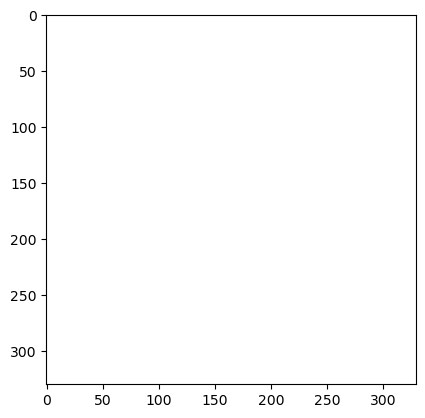

In [10]:
#create a movie of the all the unrotated frames which play at 30 fps and save it as a mp4 file

import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
from matplotlib import rc
rc('animation', html='html5')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Unrotated Frames')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, 512)
ax.set_ylim(0, 256)
im = ax.imshow(unrotFrames[0,:,:], cmap='viridis', animated=True)

def updatefig(i):
    im.set_array(unrotFrames[i,:,:])
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames=1000, interval=33, blit=True)
ani.save('unrotFrames.mp4', writer=FFMpegWriter(fps=30))
        